<a href="https://colab.research.google.com/github/ParkSlingshot/-/blob/main/SeoulBusanRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')


Mounted at /gdrive


In [24]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

plt.rc('font', family="NanumBarunGothic")

file = '/gdrive/MyDrive/data/data_2020_1_12.CSV'
data = pd.read_csv(file)

#도착영업소코드->거리
data['도착영업소코드'] = data['도착영업소코드'].map({105:20, 110:77, 115:135, 120:185, 125:240, 130:215, 135:339, 140:407})
data.rename(columns={'도착영업소코드':'거리'}, inplace=True)



In [36]:
selected_date = "2020-06-01" #@param{type : "date"}
input_date = int(selected_date.replace("-",""))
data_date = data[data['집계일자']==input_date]

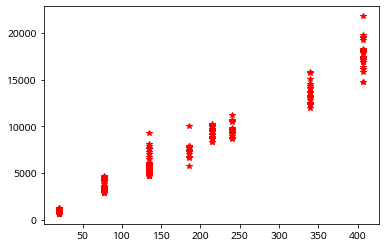

In [4]:
plt.plot(data_date['거리'], data_date['통행시간'],'r*')
plt.show()


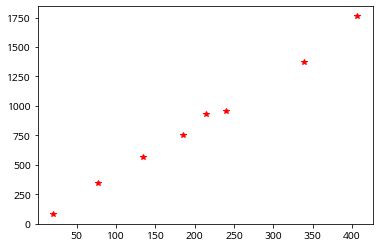

In [16]:
#집계일자와 거리로 묶은 통행시간의 평균값
data_time = data_date.groupby(by=['집계일자','거리'])['통행시간'].mean()

#data_time의 정리된 데이터 프레임
data_out = data_time.reset_index()

#list 작성
data_list = data_out.values.tolist()

#거리 : x축, 통행시간 : y축
x_train = [int(r[1]) for r in data_list]
y_train = [int(r[2]/10) for r in data_list]
plt.plot(x_train, y_train, 'r*')

In [21]:
learning_rate=1e-8
iteration=2000

sgd = tf.keras.optimizers.SGD(learning_rate = learning_rate)
mse = tf.keras.losses.mean_squared_error
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1,input_dim=1))
model.compile(loss=mse, optimizer=sgd)

Epoch 1/2000
1/1 [==============================] - 1s 548ms/step - loss: 783044.6250
Epoch 2/2000
1/1 [==============================] - 0s 5ms/step - loss: 781313.1250
Epoch 3/2000
1/1 [==============================] - 0s 7ms/step - loss: 779585.5000
Epoch 4/2000
1/1 [==============================] - 0s 4ms/step - loss: 777861.7500
Epoch 5/2000
1/1 [==============================] - 0s 4ms/step - loss: 776141.7500
Epoch 6/2000
1/1 [==============================] - 0s 5ms/step - loss: 774425.5625
Epoch 7/2000
1/1 [==============================] - 0s 4ms/step - loss: 772713.2500
Epoch 8/2000
1/1 [==============================] - 0s 11ms/step - loss: 771004.6250
Epoch 9/2000
1/1 [==============================] - 0s 4ms/step - loss: 769299.8750
Epoch 10/2000
1/1 [==============================] - 0s 5ms/step - loss: 767598.8750
Epoch 11/2000
1/1 [==============================] - 0s 11ms/step - loss: 765901.6250
Epoch 12/2000
1/1 [==============================] - 0s 4ms/step - los

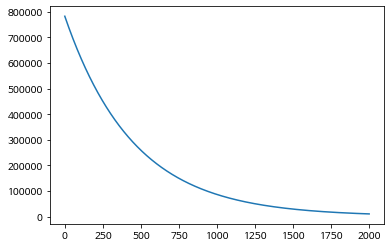

In [22]:
history = model.fit(x_train, y_train, epochs=iteration)
plt.plot(history.history['loss'])
plt.show()

In [23]:
x_train, y_train

([20, 77, 135, 185, 215, 240, 339, 407],
 [83, 343, 565, 751, 935, 960, 1370, 1761])

In [37]:
Distance = 257 #@param {type : "slider", min:0, max:500, step:1}
input_data = [Distance]
predicted_value = model.predict(input_data)
print(predicted_value)
print('%3d km takes %5.1f seconds on %s' %(Distance,predicted_value[0][0]*10, selected_date))

[[971.0688]]
257 km takes 9710.7 seconds on 2020-06-01
